# **Mandatory Assignment 1**
## *Natural Language Processing and Text Analytics (KAN-CDSCO1002U)*
Group: MA-01 1

Student IDs: 185912, 160363, xxx & xxx

Dataset: sample.xlsx

## Question 1


**Sentences 1, 3, and 4** share prepositional-phrase attachment ambiguity. The prepositional phrase “with + noun phrase” can attach to two different heads in the syntax: it can attach to the verb phrase, where it describes how the action is performed (typically an instrument/means reading), or it can attach to the noun phrase, where it describes which noun is being referred to (a modifier reading). In this setting, an ambiguous sentence is one where both attachments are grammatically possible, so the sentence allows two distinct interpretations even if one is less realistic.

**Sentence 2** also has attachment ambiguity, but it is a temporal PP attachment ambiguity. The time phrase “on Saturday” can attach either to the higher verb “decided” (the deciding happened on Saturday) or to the embedded verb “leave” (the leaving happens on Saturday). In this case, the sentence is ambiguous because the time PP has two structurally valid attachment sites, leading to two different meanings.

1. The girl attacked the boy with the book.

* She used the book to attack him.
* She attacked the boy who had the book.

2. We decided to leave on Saturday.

* The decision was made on Saturday.
* The leaving will happen on Saturday.

3. I saw a man with a briefcase.

* I saw a man who had a briefcase.
* I saw a man while I had a briefcase / with a briefcase with me.

4. I saw the planet with a telescope.

* I used a telescope to see the planet.
* I saw the planet that had a telescope.

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

def is_ambiguous_pp(sent: str, preps={"with","on","in","at","by","for","from","to","about","over","under","after","before"}):
    doc = nlp(sent)
    for p in doc:
        if p.pos_ == "ADP" and p.text.lower() in preps and any(t.dep_ == "pobj" for t in p.subtree):
            left = [t for t in doc[:p.i] if t.pos_ in ("VERB","AUX","NOUN","PROPN","PRON")]
            if not left: 
                continue
            noun = next((t for t in reversed(left) if t.pos_ in ("NOUN","PROPN","PRON")), None)
            verb = next((t for t in reversed(left) if t.pos_ in ("VERB","AUX")), None)
            if noun and verb and noun.i != verb.i:
                return True
    return False

while True:
    s = input("Sentence (blank to quit): ").strip()
    if not s: break
    print("ambiguous" if is_ambiguous_pp(s) else "not ambiguous")


ambiguous


[https://huggingface.co/spaces/nanom/syntactic_tree](https://huggingface.co/spaces/nanom/syntactic_tree)

When we compare the dependency structures, the key difference is what the preposition **“with”** is linked to.

In **sentence 3** (“I saw a man with a briefcase”), **with** is attached under **man**, meaning the prepositional phrase modifies the noun: it describes *which man* (the man who has a briefcase).

In **sentence 4** (“I saw the planet with a telescope”), **with** is attached directly under **saw**, meaning the prepositional phrase modifies the verb: it describes *how* the seeing happened (using a telescope as an instrument).

This illustrates the same core ambiguity type (prepositional phrase attachment): syntactically, a “with + NP” phrase can attach either to a nearby noun (NP-modifier) or to the verb (VP-modifier), and the surface form alone does not force one interpretation.


Sentence 3: I saw a man with a briefcase.

Tree output (dependency structure)

```
saw
├─ I
└─ man
   ├─ a
   └─ with
      └─ briefcase
         └─ a
```


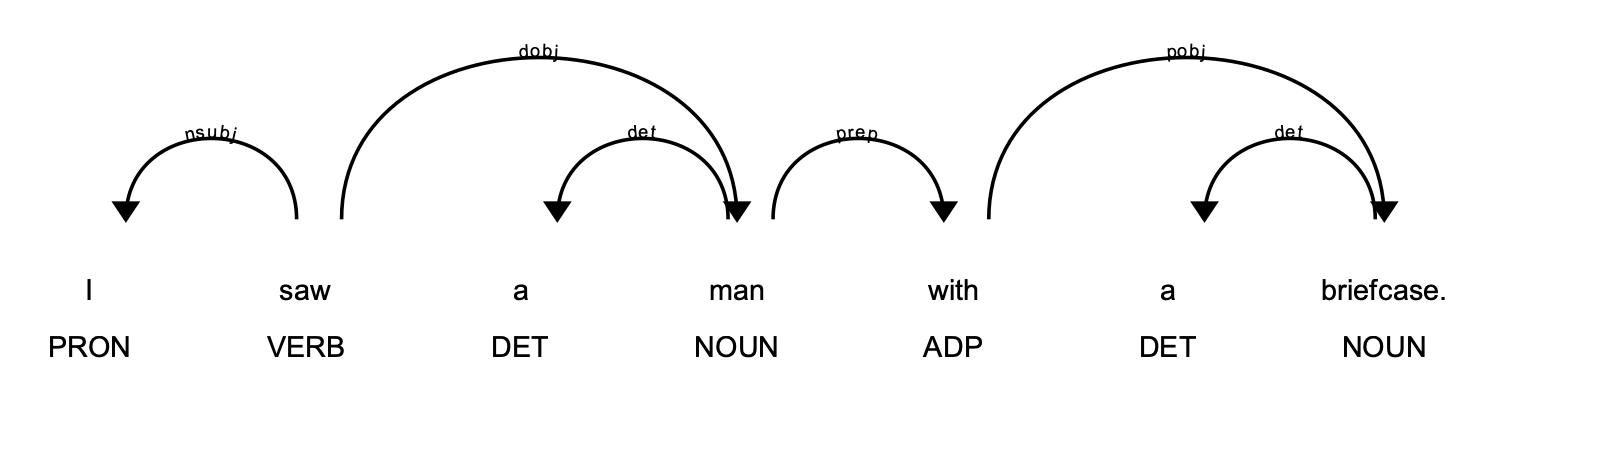

In [13]:
from IPython.display import Image, display

display(Image("Illustrations/s3.png"))


Sentence 4: I saw the planet with a telescope.

Tree output (dependency structure)

```
saw
├─ I
├─ planet
│  └─ the
└─ with
   └─ telescope
      └─ a
```


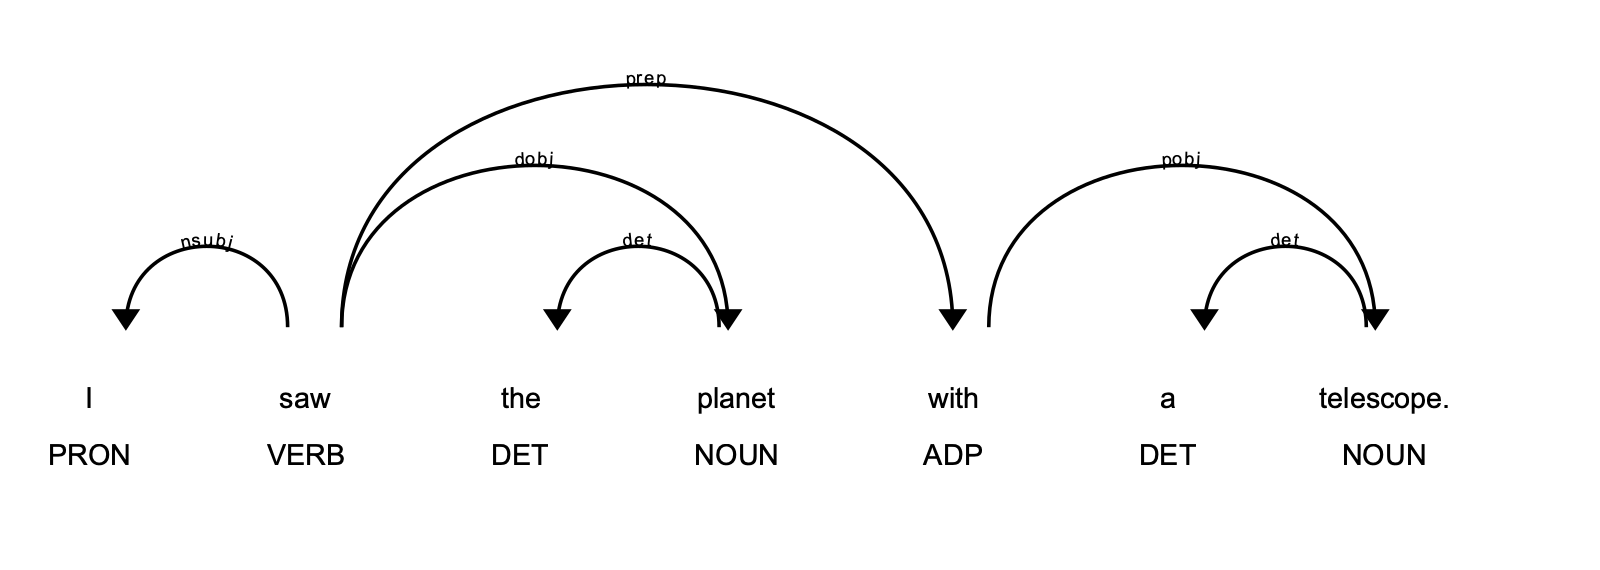

In [16]:
display(Image("Illustrations/s4.png"))

In [18]:
from pathlib import Path
import cairosvg

nlp = spacy.load("en_core_web_sm")

sentences = {
    "s3": "I saw a man with a briefcase.",
    "s4": "I saw the planet with a telescope.",
}

out_dir = Path("Illustrations")
out_dir.mkdir(exist_ok=True)

# displaCy style (good contrast)
opts = {"compact": False, "distance": 120, "bg": "#ffffff", "color": "#000000", "font": "Arial"}

for name, text in sentences.items():
    doc = nlp(text)

    # Render SVG from spaCy
    svg = displacy.render(doc, style="dep", options=opts, jupyter=False)

    # Convert to PNG with an explicit white background (prevents transparency)
    png_path = out_dir / f"{name}.png"
    cairosvg.svg2png(
        bytestring=svg.encode("utf-8"),
        write_to=str(png_path),
        output_width=1600,
        background_color="white",   # <- this is the key line
    )